In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot figures
import seaborn as sns # plot figures
import plotly.express as px
from datetime import datetime
from collections import Counter
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from statistics import mean, median, stdev, variance
import glob
import os
import math
import random
import time
import warnings
warnings.filterwarnings('ignore') 

In [2]:
file_path = "D:\\Jupyter-workspace\\PCCM Manuscript_Data Description\\b_Assign Diagnosis Groups\\"

In [3]:
df = pd.read_csv(file_path+"df_monitor_patients.csv")
print(len(df))

1711


In [4]:
# local file path
path=r'D:\00_UCL_Z-score_Data_Files'

In [5]:
# read all csv files from path folder
numerical_CSV_files = glob.glob(os.path.join(path, "*.csv"))

In [6]:
# print total number of files
len(numerical_CSV_files)

1781

In [7]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,cats_id,gender,weight_kg,age_mon,referral_outcome_datetime,referring_unit,primary_diagnosis,diagnosis_group,...,c_abpSys,c_nbpMean,c_nbpDia,c_nbpSys,c_nPleth,c_ecgRate,c_nPoxy,key_vital_sign_count,total_transport_time,Diagnosis_Group
0,0,0,30006,Female,3.30,2.0,01/07/2016 18:37,Lister Hospital-(RWH01),Atrioventricular septal defect: atrial and ven...,NaN,...,0,5115,5115,5115,5771,6046,0,0,225,Cardiovascular
1,1,1,30008,Male,3.92,0.0,01/07/2016 21:50,Luton and Dunstable Hospital-(RC971),Coarctation of aorta,NaN,...,0,4944,4944,4944,5698,5576,0,0,225,Cardiovascular
2,2,2,30013,Male,2.20,2.0,02/07/2016 23:45,Homerton University Hospital-(RQXM1),Lower respiratory tract infection,NaN,...,0,2224,2224,2225,2260,2410,0,0,200,Respiratory


In [8]:
pim_1 = df[df['pim3'] <= 0.01]
pim_1_3 = df[(df['pim3'] > 0.01)&(df['pim3'] <= 0.03)]
pim_3_5 = df[(df['pim3'] > 0.03)&(df['pim3'] <= 0.05)]
pim_5_10 = df[(df['pim3'] > 0.05)&(df['pim3'] <= 0.1)]
pim_10_15 = df[(df['pim3'] > 0.1)&(df['pim3'] <= 0.15)]
pim_15_30 = df[(df['pim3'] > 0.15)&(df['pim3'] <= 0.3)]
pim_30_100 = df[(df['pim3'] > 0.3)&(df['pim3'] <= 1)]

In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'cats_id', 'gender', 'weight_kg',
       'age_mon', 'referral_outcome_datetime', 'referring_unit',
       'primary_diagnosis', 'diagnosis_group', 'preexisting_conditions',
       'ventilation_status', 'vasoactive_agent_used', 'vasoactive_agent_name',
       'inhaled_no', 'arrive_collunit', 'depart_destunit', 'cats_interv',
       'local_interv', 'pim3', 'transport_team_in_attendance',
       'referral_datetime', 'referral_outcome', 'critical_incident',
       'incident_type', 'csv_files', 'min_session_time', 'max_session_time',
       'start_datetime', 'end_datetime', 'length_of_stay',
       'length_of_icu_stay', 'deceased_flag', 'sex', 'ethnicity_nat_code',
       'ethnicity_name', 'age_at_admission', 'age_at_death',
       'Destination Unit', 'Destination Care Area', 'Depart Collection Unit',
       'Arrive Destination Unit', 'dest_is_GOSH',
       'CI_Patient_Equipment_Related', 'CI_Patient_Related',
       'CI_Ambulance_Related', 'CI_Equipment_

In [10]:
def get_HR_list(my_df):
    data_list = list()
    for i in range(0,len(numerical_CSV_files)):
        my_csv_file = numerical_CSV_files[i]
        cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
        if cats_id in my_df[my_df['c_ecgRate'] >= 600].cats_id.tolist():
            df_data  = pd.read_csv(my_csv_file)
            df_data = df_data[df_data['necgRate'] == df_data['necgRate']]
            temp_data = df_data['necgRate'].tolist()[0:600]
            data_list.extend(temp_data)
    return data_list

In [11]:
def get_SBP_list(my_df):
    data_list = list()
    for i in range(0,len(numerical_CSV_files)):
        my_csv_file = numerical_CSV_files[i]
        cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
        if cats_id in my_df[my_df['c_nbpSys'] >= 600].cats_id.tolist():
            df_data  = pd.read_csv(my_csv_file)
            df_data = df_data[df_data['nnbpSys'] == df_data['nnbpSys']]
            temp_data = df_data['nnbpSys'].tolist()[0:600]
            data_list.extend(temp_data)
    return data_list

In [12]:
def get_DBP_list(my_df):
    data_list = list()
    for i in range(0,len(numerical_CSV_files)):
        my_csv_file = numerical_CSV_files[i]
        cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
        if cats_id in my_df[my_df['c_nbpDia'] >= 600].cats_id.tolist():
            df_data  = pd.read_csv(my_csv_file)
            df_data = df_data[df_data['nnbpDia'] == df_data['nnbpDia']]
            temp_data = df_data['nnbpDia'].tolist()[0:600]
            data_list.extend(temp_data)
    return data_list

In [13]:
def get_MBP_list(my_df):
    data_list = list()
    for i in range(0,len(numerical_CSV_files)):
        my_csv_file = numerical_CSV_files[i]
        cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
        if cats_id in my_df[my_df['c_nbpMean'] >= 600].cats_id.tolist():
            df_data  = pd.read_csv(my_csv_file)
            df_data = df_data[df_data['nnbpMean'] == df_data['nnbpMean']]
            temp_data = df_data['nnbpMean'].tolist()[0:600]
            data_list.extend(temp_data)
    return data_list

In [14]:
pim_1 = df[df['pim3'] <= 0.01]
pim_1_3 = df[(df['pim3'] > 0.01)&(df['pim3'] <= 0.03)]
pim_3_5 = df[(df['pim3'] > 0.03)&(df['pim3'] <= 0.05)]
pim_5_10 = df[(df['pim3'] > 0.05)&(df['pim3'] <= 0.1)]
pim_10_15 = df[(df['pim3'] > 0.1)&(df['pim3'] <= 0.15)]
pim_15_30 = df[(df['pim3'] > 0.15)&(df['pim3'] <= 0.3)]
pim_30_100 = df[(df['pim3'] > 0.3)&(df['pim3'] <= 1)]

# Hear Rate data list

In [15]:
ECG_PIM_1 = get_HR_list(pim_1)
ECG_PIM_1_3 = get_HR_list(pim_1_3)
ECG_PIM_3_5 = get_HR_list(pim_3_5)
ECG_PIM_5_10 = get_HR_list(pim_5_10)
ECG_PIM_10_15 = get_HR_list(pim_10_15)
ECG_PIM_15_30 = get_HR_list(pim_15_30)
ECG_PIM_30_100 = get_HR_list(pim_30_100)

In [16]:
# Generate data used for plotting
data_ECG = [ECG_PIM_1,ECG_PIM_1_3,ECG_PIM_3_5,ECG_PIM_5_10,ECG_PIM_10_15,ECG_PIM_15_30,ECG_PIM_30_100]

# SBP data list

In [17]:
SBP_PIM_1 = get_SBP_list(pim_1)
SBP_PIM_1_3 = get_SBP_list(pim_1_3)
SBP_PIM_3_5 = get_SBP_list(pim_3_5)
SBP_PIM_5_10 = get_SBP_list(pim_5_10)
SBP_PIM_10_15 = get_SBP_list(pim_10_15)
SBP_PIM_15_30 = get_SBP_list(pim_15_30)
SBP_PIM_30_100 = get_SBP_list(pim_30_100)

In [18]:
# Generate data used for plotting
data_SBP = [SBP_PIM_1,SBP_PIM_1_3,SBP_PIM_3_5,SBP_PIM_5_10,SBP_PIM_10_15,SBP_PIM_15_30,SBP_PIM_30_100]

# DBP data list

In [19]:
DBP_PIM_1 = get_DBP_list(pim_1)
DBP_PIM_1_3 = get_DBP_list(pim_1_3)
DBP_PIM_3_5 = get_DBP_list(pim_3_5)
DBP_PIM_5_10 = get_DBP_list(pim_5_10)
DBP_PIM_10_15 = get_DBP_list(pim_10_15)
DBP_PIM_15_30 = get_DBP_list(pim_15_30)
DBP_PIM_30_100 = get_DBP_list(pim_30_100)

In [20]:
# Generate data used for plotting
data_DBP = [DBP_PIM_1,DBP_PIM_1_3,DBP_PIM_3_5,DBP_PIM_5_10,DBP_PIM_10_15,DBP_PIM_15_30,DBP_PIM_30_100]

# MBP data list

In [21]:
MBP_PIM_1 = get_MBP_list(pim_1)
MBP_PIM_1_3 = get_MBP_list(pim_1_3)
MBP_PIM_3_5 = get_MBP_list(pim_3_5)
MBP_PIM_5_10 = get_MBP_list(pim_5_10)
MBP_PIM_10_15 = get_MBP_list(pim_10_15)
MBP_PIM_15_30 = get_MBP_list(pim_15_30)
MBP_PIM_30_100 = get_MBP_list(pim_30_100)

In [22]:
# Generate data used for plotting
data_MBP = [MBP_PIM_1,MBP_PIM_1_3,MBP_PIM_3_5,MBP_PIM_5_10,MBP_PIM_10_15,MBP_PIM_15_30,MBP_PIM_30_100]

In [23]:
# https://stackoverflow.com/questions/18861075/overlaying-the-numeric-value-of-median-variance-in-boxplots
# 

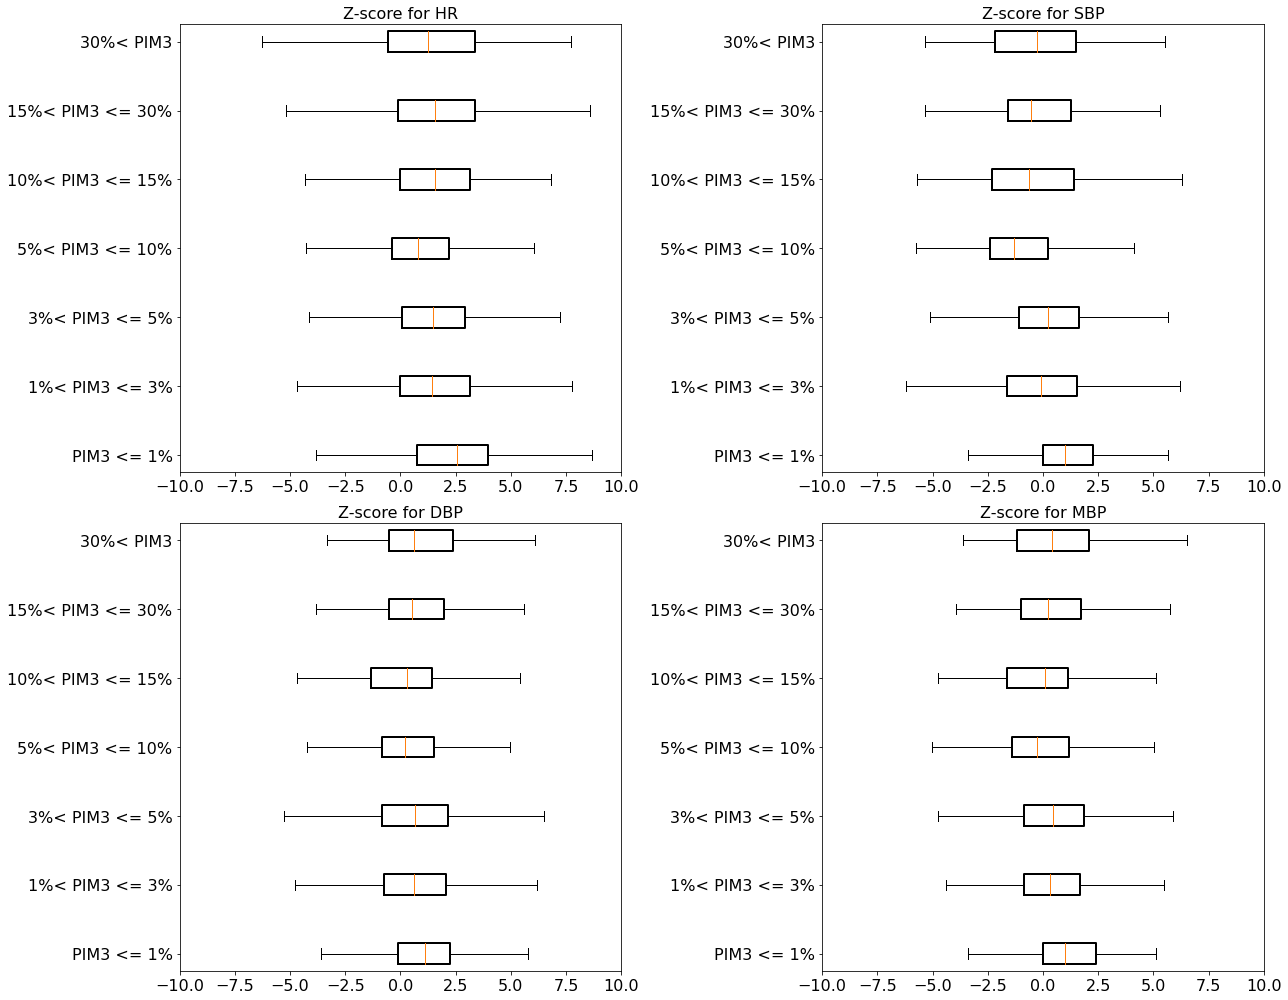

In [26]:
#fig = plt.figure() # create the canvas for plotting
f, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(18,14))
ax1 = plt.subplot(2,2,1)
data = data_ECG
ticks = ['PIM3 <= 1%','1%< PIM3 <= 3%','3%< PIM3 <= 5%','5%< PIM3 <= 10%','10%< PIM3 <= 15%','15%< PIM3 <= 30%','30%< PIM3']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation = 0, Fontsize=16)
ax1.set_yticklabels(labels=ax1.get_yticklabels(), Fontsize=16)
ax1.set_title('Z-score for HR', fontsize=16)

ax2 = plt.subplot(2,2,2)
data = data_SBP
ticks = ['PIM3 <= 1%','1%< PIM3 <= 3%','3%< PIM3 <= 5%','5%< PIM3 <= 10%','10%< PIM3 <= 15%','15%< PIM3 <= 30%','30%< PIM3']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax2.set_xticklabels(labels=ax2.get_xticklabels(), rotation = 0, Fontsize=16)
ax2.set_yticklabels(labels=ax2.get_yticklabels(), Fontsize=16)
ax2.set_title('Z-score for SBP', fontsize=16)

ax3 = plt.subplot(2,2,3)
data = data_DBP
ticks = ['PIM3 <= 1%','1%< PIM3 <= 3%','3%< PIM3 <= 5%','5%< PIM3 <= 10%','10%< PIM3 <= 15%','15%< PIM3 <= 30%','30%< PIM3']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax3.set_xticklabels(labels=ax3.get_xticklabels(), rotation = 0, Fontsize=16)
ax3.set_yticklabels(labels=ax3.get_yticklabels(), Fontsize=16)
ax3.set_title('Z-score for DBP', fontsize=16)


ax4 = plt.subplot(2,2,4)
data = data_MBP
ticks = ['PIM3 <= 1%','1%< PIM3 <= 3%','3%< PIM3 <= 5%','5%< PIM3 <= 10%','10%< PIM3 <= 15%','15%< PIM3 <= 30%','30%< PIM3']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax4.set_xticklabels(labels=ax4.get_xticklabels(), rotation = 0, Fontsize=16)
ax4.set_yticklabels(labels=ax4.get_yticklabels(), Fontsize=16)
ax4.set_title('Z-score for MBP', fontsize=16)

plt.savefig('S_Fig4_Boxplot_Z-scores_HR_RR_BP_by_PIM3.eps', format='eps')